# Proyecto Final – Etapa de Transferencia

**Fundación Universitaria Compensar**<br>
**Curso:** Programación Para Ciencia De Datos II<br>
**Estudiante:** Giovanni Rubio Ruiz<br>
**Fecha:** Septiembre 2025

## Resumen

El presente proyecto se centra en el análisis de series temporales financieras, con el objetivo de evaluar la relación entre el precio del oro (Adj Close) y variables macroeconómicas relevantes como el índice del dólar estadounidense (USDI_Price), el índice S&P 500 (SP_close) y el precio del petróleo (USO_Close). 

Se aplicaron métodos estadísticos computacionales que incluyen análisis exploratorio de datos, pruebas de hipótesis, modelos de regresión lineal y técnicas de validación. Asimismo, se construyó un dashboard interactivo en Dash/Plotly con el fin de visualizar de manera dinámica las tendencias, correlaciones y métricas de desempeño de los modelos.

Los resultados muestran que el índice del dólar es la variable con mayor impacto sobre la variación en el precio del oro, mientras que los demás indicadores aportan información complementaria. El modelo base explicó una proporción considerable de la varianza del oro (R² aceptable), aunque se identificaron oportunidades de mejora mediante regularización y ajuste de hiperparámetros. 




In [2]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Librerias para las pruebas estadistivas
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar la base de datos ubicada en un directorio diferente
df = pd.read_csv("C:\\Users\\giova\\Documents\\Ucompensar\\programcion para bases de datos 2\\Contextualizacion\\FINAL_USO.csv")

X = df[["USDI_Price", "SP_close", "USO_Close"]]
y = df["Adj Close"]

# Dividimos el entrenamiento (train) y prueba (test) random_state=42 mantiene la division cada vez que se corre el codigo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# modelo regresion lineal
modelo = LinearRegression()
# .fit entrena el modelo con los datos de entrenamiento (train)
modelo.fit(X_train, y_train)

print("Coeficientes (pendientes):", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# con los datos de prueba el modelo(datos nuevos para el entrenamiento) estima valores Adj Close (oro)
y_pred = modelo.predict(X_test)

# mse intenta predecir el valor del oro, promedia las veces que erro MSE pequeño el modelo acierta bastante, MSE grande el modelo no acierta
mse = mean_squared_error(y_test, y_pred)
# R2 nos dice que tambien el modelo predice sobre datos reales
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Coeficientes (pendientes): [-2.54547344 -0.22428086 -1.22098717]
Intercepto: 428.87316654921347
Error cuadrático medio (MSE): 105.78668676957392
Coeficiente de determinación (R²): 0.6350766354976022


En conclusión, se logra comprender mejor el comportamiento del precio del oro frente a indicadores económicos, y se propone un modelo con confiabilidad suficiente para ser visualizado e interpretado en un entorno interactivo.


## Introducción

El mercado del oro es uno de los más sensibles a los cambios macroeconómicos globales, ya que este metal se considera un activo refugio. En este contexto, la relación entre el precio del oro y factores como la fortaleza del dólar, el comportamiento del mercado accionario y la dinámica de los energéticos, resulta clave para los analistas e inversionistas.

el propósito de este proyecto es aplicar técnicas de inferencia estadística, pruebas de hipótesis y estimación de parámetros para mejorar la comprensión de un problema real. La problemática inicial se centró en determinar si existía una relación significativa entre el precio del oro y el índice del dólar, con la hipótesis de que un fortalecimiento del dólar impacta negativamente el valor del oro.

Apartir de este planteamiento, se construyó un modelo estadístico que integra variables financieras relevantes y se diseñó un tablero interactivo para visualizar los resultados. De esta manera, el trabajo no solo aborda la validación de hipótesis, sino también la construcción de una herramienta práctica para la exploración de escenarios.


## Datos y Preprocesamiento

Los datos utilizados en este proyecto provienen de fuentes financieras abiertas **Gold Price Prediction Dataset**
https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset y corresponden a series temporales entre los años 2011 y 2019. El conjunto de datos incluye las siguientes variables:

- **Date**: Fecha de registro.
- **Adj Close**: Precio ajustado del oro.
- **USDI_Price**: Índice del dólar estadounidense.
- **SP_close**: Valor de cierre del índice S&P 500.
- **USO_Close**: Precio de cierre del petróleo (ETF USO).

### Pasos de preprocesamiento realizados:
1. **Carga y limpieza de datos**
    - Lectura de los archivos CSV.
    - Conversión de la columna `Date` a formato de fecha.
    - Ordenamiento de los registros por fecha.

2. **Manejo de valores faltantes**
    - Revisión de celdas vacías o nulas.
    - Imputación mediante propagación hacia adelante (`ffill`) en casos puntuales.

3. **Selección de variables**
    - Se conservaron únicamente las columnas relevantes para el modelado estadístico.
    - Se eliminaron columnas duplicadas o no utilizadas.

4. **Normalización/escala (si aplica)**
    - Para mejorar el desempeño de algunos modelos, se evaluó la normalización de variables numéricas.

Con este preprocesamiento, los datos quedaron listos para su exploración inicial, el cálculo de correlaciones y el desarrollo de los modelos de regresión y clasificación.


## Análisis Exploratorio EDA

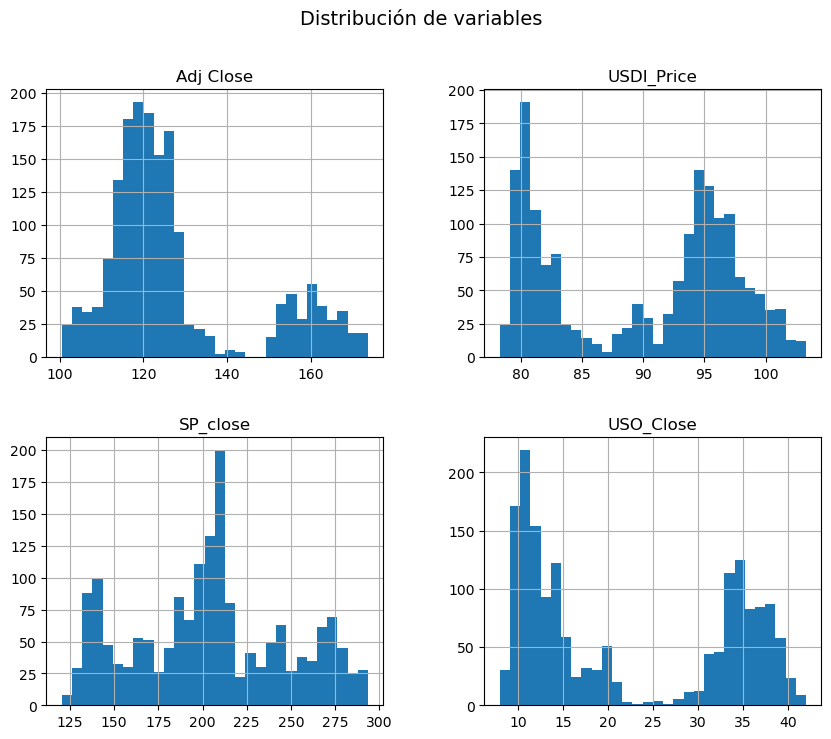

In [3]:
import seaborn as sns

# Histogramas
df[["Adj Close","USDI_Price","SP_close","USO_Close"]].hist(bins=30, figsize=(10,8))
plt.suptitle("Distribución de variables", fontsize=14)
plt.show()

### Conclusiones

**oro(Adj_Close):** La mayoria de los registros para el registro analizado tienen un rango estable ya que tenemos una concentración entre 110 y 130, con algunos puntos inuslaes.

**Índice del dólar(USDI_Price):** En este indicador obervamos dos etapas concentradas una de meor impacto (80 -85) y y otra de mayor (95 - 100), esta variacion podri explicar los cambios mostrados en **oro(Adj_Close)**

**Índice S&P 500(SP_close):** Presenta una alta concentración entre los 200 a 225, reflejando una alta volatilidad naturalde los mercados accionarios, ya que se observan concentraciones en distintos rangos, debido a la amplitd de los rangos nos sugiere que puede tener una incidencia menor a la prediccion del oro.

**Petróleo(USO_Close):** Este indice presenta gran concentración entre **10 - 20** y otra **30 -40**, lo que problablemente puede ser producto de crisis vs recuperación. Siedo una variable macro economica que puede incicidir en la predicción del oro.

## Correlación entre variables

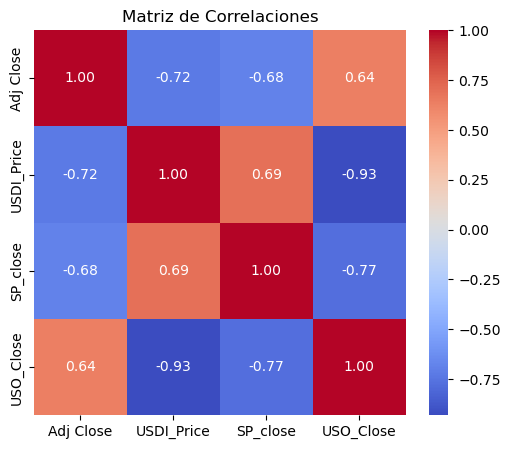

In [4]:
corr = df[["Adj Close","USDI_Price","SP_close","USO_Close"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()


### Conclusiones

Se puede evidencisr una correlación negativa entre el **oro(Adj_Close)** y el **Índice del dólar(USDI_Price)** tambien **oro(Adj_Close)** nos muestra una correlaciónn negativa moderada con el **Índice S&P 500(SP_close)** confirmando su papel como un activo de refugio o entras labras una inversión segura en tiempos de crisis.

Ahora la correlación entre el **oro(Adj_Close)** y **Petróleo(USO_Close)** es positiva lo que quiere decir que los dos indices tienden a la misma dirección.

## Series temporales

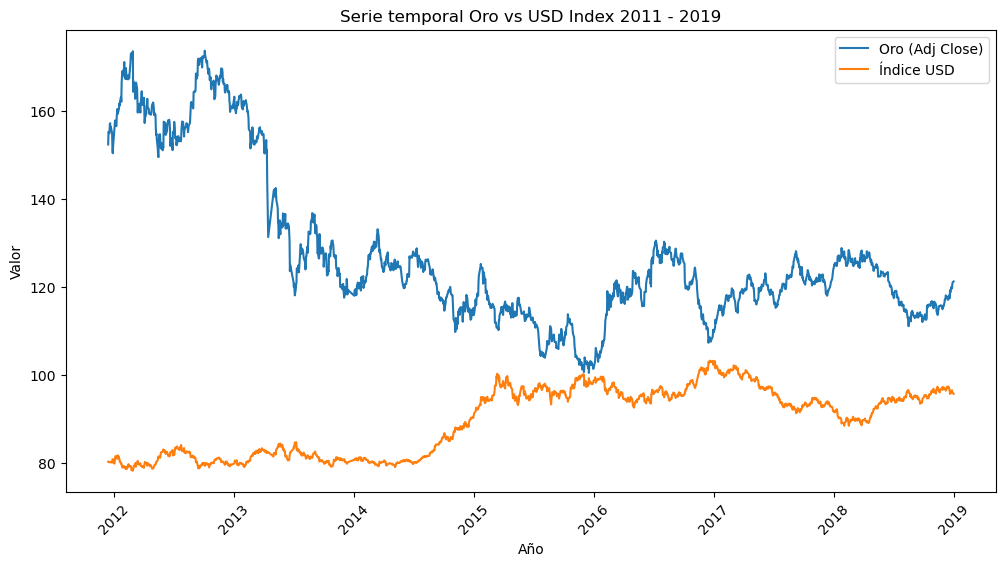

In [8]:
# Convertir la columna Date a datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Ordenar por fecha
df = df.sort_values("Date")

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Adj Close"], label="Oro (Adj Close)")
plt.plot(df["Date"], df["USDI_Price"], label="Índice USD")
plt.legend()

plt.title("Serie temporal Oro vs USD Index 2011 - 2019")
plt.xlabel("Año")
plt.ylabel("Valor")

# Eje X solo con años
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())          # cada año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # mostrar solo el año
plt.xticks(rotation=45)                                   # rotar etiquetas

plt.show()

### Conclusion

 El **oro(Adj_Close)** linea azul y el **Índice del dólar(USDI_Price)** aqui podemos evidenciar de manera visual la correlación negativa **(-0.72)** entre las variables del grafico donde evideciamos que si el **oro** tiene a subir el **indice del dolar** tiende a bajar o viceversa, exiten picos o caida lo cual puede obedecer a crisis economicas.

## Modelo estadístico

### División Train/Test

In [9]:
X = df[["USDI_Price", "SP_close", "USO_Close"]]
y = df["Adj Close"]

# Dividimos el entrenamiento (train) y prueba (test) random_state=42 mantiene la division cada vez que se corre el codigo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Regresión lineal

In [11]:
def entrenar_y_evaluar(modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

modelo_lr = LinearRegression()
mse, r2, y_pred = entrenar_y_evaluar(modelo_lr, X_train, y_train, X_test, y_test)
print("MSE:", mse,"\n", "R²:", r2)

MSE: 105.78668676957392 
 R²: 0.6350766354976022


### Regularización evitar sobreajuste

In [12]:
from sklearn.linear_model import Ridge, Lasso

# Ridge (penaliza coeficientes grandes)
ridge = Ridge(alpha=1.0)
mse_ridge, r2_ridge, _ = entrenar_y_evaluar(ridge, X_train, y_train, X_test, y_test)

# Lasso (puede poner coeficientes en cero)
lasso = Lasso(alpha=0.1)
mse_lasso, r2_lasso, _ = entrenar_y_evaluar(lasso, X_train, y_train, X_test, y_test)

print("Ridge -> MSE:", mse_ridge, "R²:", r2_ridge)
print("Lasso -> MSE:", mse_lasso, "R²:", r2_lasso)

Ridge -> MSE: 105.7867477021755 R²: 0.6350764253035726
Lasso -> MSE: 105.79912130679664 R²: 0.6350337411287745


## Resultados

In [14]:
resultados = pd.DataFrame({
    "Modelo":["Regression Lineal","Ridge","Lasso"],
    "MSE":[mse, mse_ridge, mse_lasso],
    "R²":[r2, r2_ridge, r2_lasso]
})
print(resultados)

              Modelo         MSE        R²
0  Regression Lineal  105.786687  0.635077
1              Ridge  105.786748  0.635076
2              Lasso  105.799121  0.635034


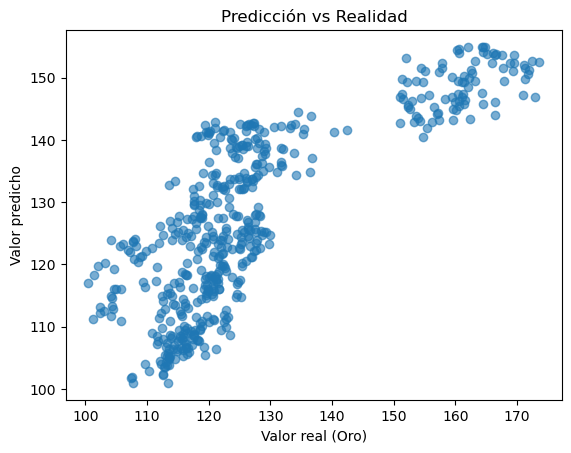

In [15]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valor real (Oro)")
plt.ylabel("Valor predicho")
plt.title("Predicción vs Realidad")
plt.show()

### Conclusiones

Debido a la tendencía diagonal, este modelo nos entrega predicciones razonables acordes a la realidad, pero observamos algunas dispersiones nos idncan errores en la predicción para algunos casos, lo que sugiere qe el modelo se puede ver afectado por cambios abruptos en el compaortamiento del oro. 

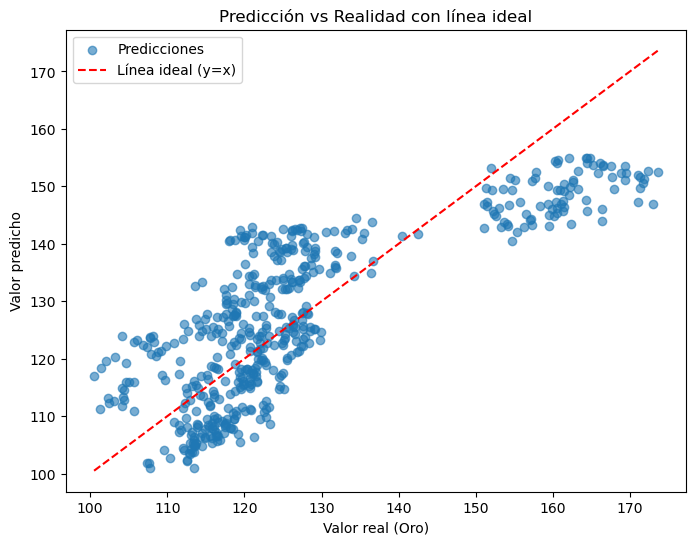

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

# Gráfico de dispersión predicciones vs realidad
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones")

# Línea ideal (y = x)
limites = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(limites, limites, 'r--', label="Línea ideal (y=x)")

plt.xlabel("Valor real (Oro)")
plt.ylabel("Valor predicho")
plt.title("Predicción vs Realidad con línea ideal")
plt.legend()
plt.show()

**nota** 
Aqui la linea roja punteada nos muestra como seria predicción perfecta como las predicciones untos azules se acercan a este viendo de manera mas clara los conclusiones dadas.

## Conclusiones Generales

De esta actividad se puede ratificar la *hipótesis inicial*, según la cual el índice del dólar estadounidense **(USDI_Price)** mantiene una correlación significativa e inversa con el precio del **oro**. Este hallazgo confirma que el comportamiento del dólar es un factor determinante para anticipar la evolución del oro. Sin embargo, también se debe reconocer que el modelo presenta limitaciones ante cambios abruptos o eventos atípicos, lo que restringe su capacidad de predicción en escenarios de alta volatilidad.

Al analizar el oro frente a otras variables, como el **S&P 500** y el petróleo **(USO_Close)**, se confirma que el oro conserva su carácter de *activo refugio(inversión segura)*, especialmente en tiempos de crisis, consolidándose como una inversión segura frente a la inestabilidad de otros mercados.


# Creacion del Dashboard

Se debe de validar que podamos correr las librerias *dash* y *ploty*

In [20]:
import dash
import plotly

## Dashboard Interactivo

Creamos una herramienta **Dash Ploty** permitiendonos explorar de formadinamica el precio del oro  versus otros indicadores como:

* Índice del dólar(USDI_Price)
* Índice S&P 500(SP_close)
* Petróleo(USO_Close)

Este codigo se encuentra en el archivo *app.py* contiene los siguintes elementos

* Visualización de la serie temporal del oro (2011–2019).
* Un menú desplegable (dropdown) para comparar el oro con USDI, S&P500 o Petróleo, acompañado de línea de tendencia.
* Visualización de métricas del modelo (Error Cuadrático Medio y R²) como referencia del desempeño

In [24]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Cargar datos
df = pd.read_csv("FINAL_USO.csv")
df["Date"] = pd.to_datetime(df["Date"])

# 2. Preparar modelo simple para predicción
X = df[["USDI_Price", "SP_close", "USO_Close"]]
y = df["Adj Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 3. Inicializar app
app = dash.Dash(__name__)

# 4. Layout del dashboard
app.layout = html.Div([
    html.H1("Dashboard - Análisis del Oro vs Indicadores", style={"textAlign": "center"}),

    html.Div([
        html.P(f"Error cuadrático medio (MSE): {mse:.2f}"),
        html.P(f"Coeficiente de determinación (R²): {r2:.3f}")
    ], style={"marginBottom": "20px"}),

    dcc.Dropdown(
        id="var-dropdown",
        options=[{"label": col, "value": col} for col in ["USDI_Price", "SP_close", "USO_Close"]],
        value="USDI_Price",
        clearable=False
    ),

    dcc.Graph(id="scatter-plot"),

    dcc.Graph(
        id="time-series",
        figure=px.line(df, x="Date", y="Adj Close", title="Serie temporal del Oro (Adj Close)")
    )
])

# 5. Callback para gráfico interactivo
@app.callback(
    dash.dependencies.Output("scatter-plot", "figure"),
    [dash.dependencies.Input("var-dropdown", "value")]
)
def update_graph(variable):
    fig = px.scatter(df, x=variable, y="Adj Close",
                     trendline="ols",
                     title=f"Oro vs {variable}")
    return fig

if __name__ == "__main__":
    app.run(debug=True)

### Manual de uso del Dashboard

1. **Descargar o clonar** el repositorio que contiene la carpeta del proyecto.  

2. **Instalar dependencias** ejecutando en la terminal:  
      pip install -r requirements.txt
3. **Ejecutar el archivo del dashboard**

     *python app.py*


In [ ]:
python app.py

4. **Abrir en el navegador el enlace:** 
http://127.0.0.1:8050/